# Exploration of CIFAR10 Dataset and Comparison of Classifiers


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import cv2

In [2]:
def unpickle(file): #Function to obtain the pickled data from the data set
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## 1: Dataset Overview

In [3]:
datadict = unpickle(r'cifar-10-python.tar\cifar-10-batches-py\data_batch_1')
meta = unpickle(r'cifar-10-python.tar\cifar-10-batches-py\batches.meta')
test = unpickle(r'cifar-10-python.tar\cifar-10-batches-py\test_batch')
X = datadict[b"data"]
Y = datadict[b'labels']
X_test = test[b"data"]
Y_test = test[b'labels']

In [5]:
print(datadict.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [6]:
X.shape

(10000, 3072)

In [4]:
# For train batch
imgs = []
labels = []
categories = []
meansRed = []
meansGreen = []
meansBlue = []

for im_idx in range(10000):
    im = X[im_idx, :]
    
    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)
    
    # Obtain the mean intensity value for each of the color channels
    meansRed.append(np.sum(im_r)/1024)
    meansGreen.append(np.sum(im_g)/1024)
    meansBlue.append(np.sum(im_b)/1024)
    
    imgs.append(np.dstack((im_r, im_g, im_b))) #Shape the images 
    labels.append(Y[im_idx])
    categories.append(meta[b'label_names'][Y[im_idx]])

In [5]:
# For test batch
test_imgs = []
test_labels = []
test_categories = []
test_meansRed = []
test_meansGreen = []
test_meansBlue = []

for im_idx in range(10000):
    test_im = X_test[im_idx, :]
    
    test_im_r = test_im[0:1024].reshape(32, 32)
    test_im_g = test_im[1024:2048].reshape(32, 32)
    test_im_b = test_im[2048:].reshape(32, 32)
    
    # Obtain the mean intensity value for each of the color channels
    test_meansRed.append(np.sum(test_im_r)/1024)
    test_meansGreen.append(np.sum(test_im_g)/1024)
    test_meansBlue.append(np.sum(test_im_b)/1024)
    
    test_imgs.append(np.dstack((test_im_r, test_im_g, test_im_b))) #Shape the images 
    test_labels.append(Y_test[im_idx])
    test_categories.append(meta[b'label_names'][Y_test[im_idx]])

In [9]:
meanFeautures = np.dstack((meansRed,meansGreen,meansBlue))
test_meanFeautures = np.dstack((test_meansRed,test_meansGreen,test_meansBlue))
airplanes_idx = [i for i, n in enumerate(labels) if n == 0] 
automobile_idx = [i for i, n in enumerate(labels) if n == 1] 
bird_idx = [i for i, n in enumerate(labels) if n == 2] 
cat_idx = [i for i, n in enumerate(labels) if n == 3] 
deer_idx = [i for i, n in enumerate(labels) if n == 4] 
dog_idx = [i for i, n in enumerate(labels) if n == 5]
frog_idx = [i for i, n in enumerate(labels) if n == 6] 
horse_idx = [i for i, n in enumerate(labels) if n == 7] 
ship_idx = [i for i, n in enumerate(labels) if n == 8] 
truck_idx = [i for i, n in enumerate(labels) if n == 9] 

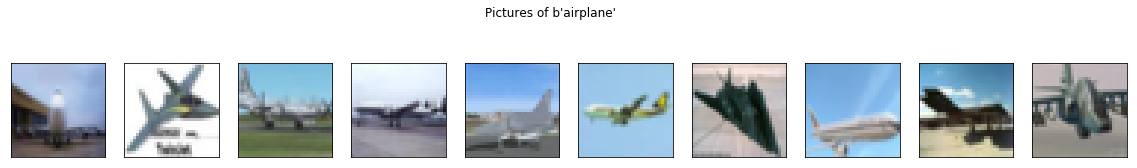

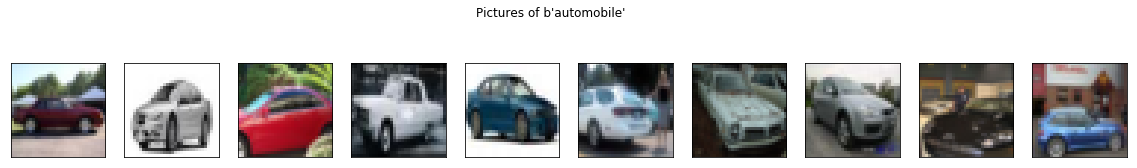

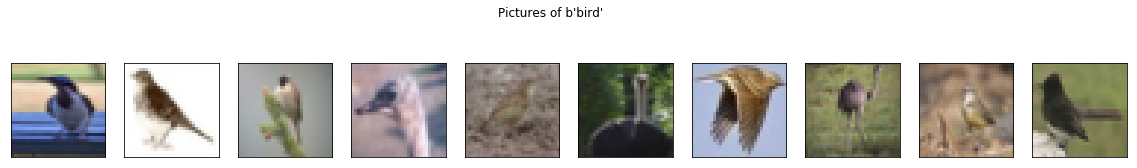

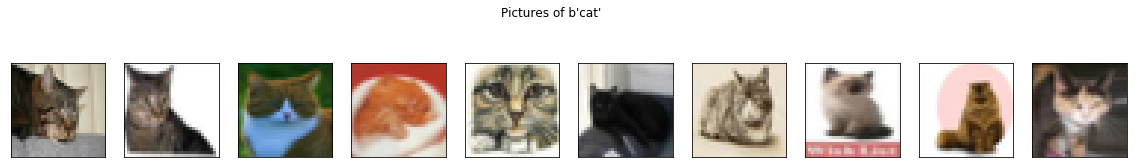

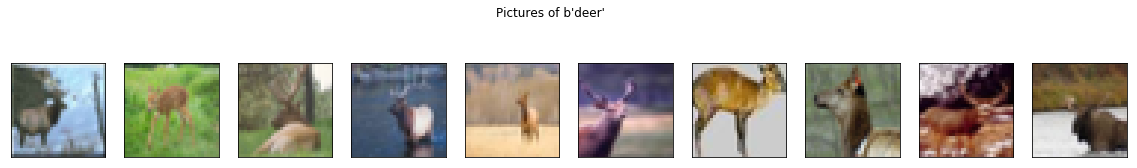

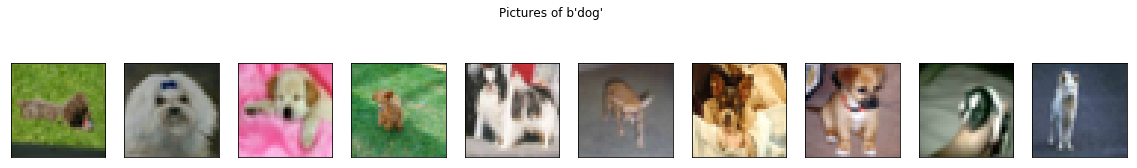

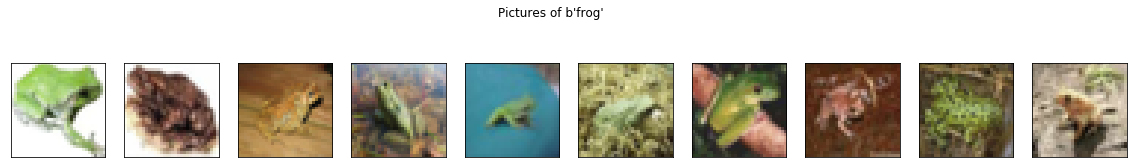

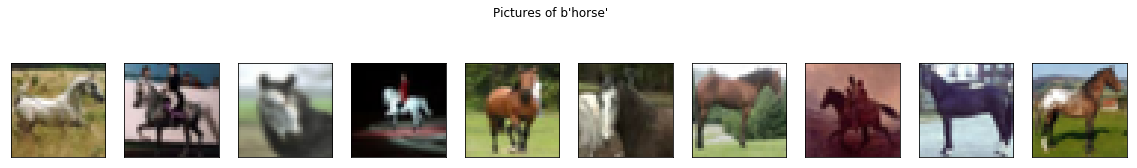

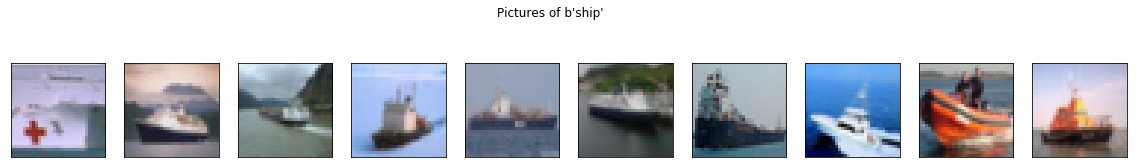

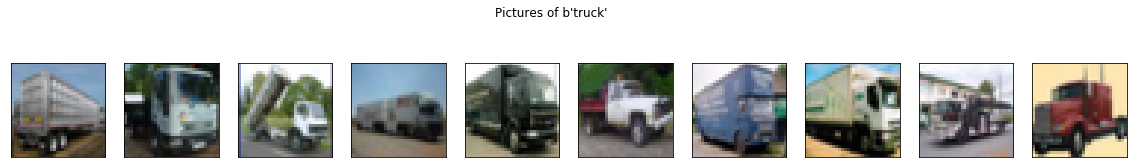

In [9]:
to_print = np.random.choice(airplanes_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][0]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(automobile_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][1]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(bird_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][2]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(cat_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][3]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(deer_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][4]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(dog_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][5]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(frog_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][6]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(horse_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][7]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(ship_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][8]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()

to_print = np.random.choice(truck_idx,10,replace='False')

plt.figure(figsize=(20,3))
plt.suptitle('Pictures of {}'.format(meta[b'label_names'][9]))
for i in range(10):
    plt.subplot(1,10,i+1),plt.imshow(imgs[to_print[i]]), plt.xticks([]),plt.yticks([])
plt.show()


### Features Extraction

In [6]:
# Using HOG for Feature Extraction

cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins
# definning function to compute the hog features
def my_HOG(imgs):
    h = []
    cells= []
    for i in range(0, len(imgs)):
        hog = cv2.HOGDescriptor(_winSize = (imgs[i].shape[1]//cell_size[1]*cell_size[1], 
                                            imgs[i].shape[0]//cell_size[0]*cell_size[0]),
                                _blockSize = (block_size[1]*cell_size[1], 
                                              block_size[0]*cell_size[0]),
                                _blockStride = (cell_size[1], cell_size[0]),
                                _cellSize = (cell_size[1], cell_size[0]),
                                _nbins = nbins)
        
        n_cells = (imgs[i].shape[0]//cell_size[0], imgs[i].shape[1]//cell_size[1])
        cells.append(n_cells)
        
        h.append(hog.compute(imgs[i])) 
    return np.array(h)

In [7]:
h_train = my_HOG(imgs)
h_test = my_HOG(test_imgs)

In [12]:
print(np.shape(h_test))

(10000, 324, 1)


## 2: SVMs

### 2.1: Linear SVMs - Exploring Features

In [10]:
mf = meanFeautures.reshape(10000,3)
test_mf = test_meanFeautures.reshape(10000,3)
hf = h_train.reshape(10000,324)
test_hf = h_test.reshape(10000,324)

In [28]:
svms = svm.SVC(kernel='linear', gamma='scale')
linearMeans_svm = svms.fit(mf, labels)

In [21]:
predicted_means_svm = linearMeans_svm.predict(test_mf)
score_svm_m = accuracy_score(predicted_means_svm,test_labels)

In [22]:
print('The Score Obtained with this classifier using the means is {}'.format(score_svm_m))

The Score Obtained with this classifier using the means is 0.2405


In [23]:
print(linearMeans_svm.score(test_mf,test_labels))

0.2405


In [32]:
linearHog_svm = svms.fit(hf, labels)

In [33]:
predicted_hog_svm = linearHog_svm.predict(test_hf)
score_svm_h = accuracy_score(predicted_hog_svm,test_labels)

In [34]:
print('The Score Obtained with this classifier using the HoG feautures is {}'.format(score_svm_h))

The Score Obtained with this classifier using the HoG feautures is 0.5381


In [29]:
print(linearHog_svm.score(test_hf,test_labels))

0.5381


From the scores obtained by fitting the models to the data one is able to see that using HoG features gives considerable better score than using the mean intenstities of the RGB channels. This is expected beacuse HoG feautures provide a more specific list of features for the specific image, while the intensities will provide a less accurate prdeiction because images of completely different categories can have similar color intensities. An instance where the two features could provide scores that are more close to each other would be if the different categories have very specfic color schemes for every image in that category.

### 2.2: Non-Linear SVMs - Exploring SVMs Kernels

In [30]:
svm_poly = svm.SVC(kernel='poly', gamma='scale')
svm_rbf = svm.SVC(kernel='rbf', gamma='scale')

linearHog_svm_poly = svm_poly.fit(hf, labels)
linearHog_svm_rbf = svm_rbf.fit(hf, labels)

In [31]:
print(linearHog_svm_poly.score(test_hf,test_labels))
print(linearHog_svm_rbf.score(test_hf,test_labels))

0.459
0.533


The SVM with the Radial Basis Function (RBF) kernel provides a higher score, which means it has a higher accuracy of prediction than the one with the Polynomial kernel. The kernel provides the hyperplane where the data is going to be separated. It is expected that RBF provides higher accuracy because it involves the usage of Gaussian functions for the hyperplane. The Linear SVM Kernel provided a better score than the RBF with the HoG Feautures. Both performed better than the linear SVM with the mean intensities as feautures.

## 3: Random Forest Classifiers

### 3.1: RF - Exploring Performance of HoG Features

In [15]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc_100 = clf.fit(hf, labels)

In [17]:
rfc100_score = rfc_100.score(test_hf,test_labels)
print(rfc100_score)

0.5186


The classifier had a score of 51.86% with 100 trees, this was lower than the scores obtained with the SVM using the Linear and RBF Kernel with HoG Feautures

### 3.2: RF - Exploring Different Number of Trees

In [11]:
clf_40 = RandomForestClassifier(n_estimators=40, criterion='entropy')
clf_200 = RandomForestClassifier(n_estimators=200, criterion='entropy')
clf_250 = RandomForestClassifier(n_estimators=250, criterion='entropy')

rfc_40 = clf_40.fit(hf, labels)
rfc_200 = clf_200.fit(hf, labels)
rfc_250 = clf_250.fit(hf, labels)

In [12]:
rfc40_score = rfc_40.score(test_hf,test_labels)
rfc200_score = rfc_200.score(test_hf,test_labels)
rfc250_score = rfc_250.score(test_hf,test_labels)

print(rfc_40.score(test_hf,test_labels))
print(rfc_200.score(test_hf,test_labels))
print(rfc_250.score(test_hf,test_labels))

0.4781
0.5372
0.5375


The classifier using 250 Trees gives the best results. As the number of trees are increased the accuracy score will improve, so this result was what was expected. Using 40 trees resulted in a lower score so that also makes sense

## 4: Comparison of Classifiers

### 4.1: Performance Analysis

##### For SVM classifier

In [32]:
# To obtain the accuracy on the trainning set, 
# model will be trained and the same trainning set will be used as the test set.

# Best performing SVM, Linear Kernel with HoG Feautures 
linearHog_svm = svms.fit(hf, labels)
predicted_hog_svm_hog = linearHog_svm.predict(hf)
train_score_hog_svm = accuracy_score(predicted_hog_svm_hog,labels)
print('The accuracy of the Linear SVM using HoG Feautures on the trainning set is: {}'.format(train_score_hog_svm))

The accuracy of the Linear SVM using HoG Feautures on the trainning set is: 0.6239


In [33]:
conf_svm_train = confusion_matrix(labels,predicted_hog_svm_hog)
print(conf_svm_train)

[[684  34  69  11  30   6  12  19 122  18]
 [ 36 737  12  14  18   7  28  10  67  45]
 [ 93  27 514  73  88  78  82  43  28   6]
 [ 23  29  87 440  90 121 118  70  15  23]
 [ 45  23  53  63 584  50  53  77  25  26]
 [ 10  15  76 118  71 482  80  69   5  11]
 [ 24  22  57  72  48  60 707  18  12  10]
 [ 18  15  54  42  80  65  26 662  17  22]
 [ 99  68  28  14  25   4  12  17 714  44]
 [ 33  43  15  28  50   9   6  31  51 715]]


c:\users\isaac\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


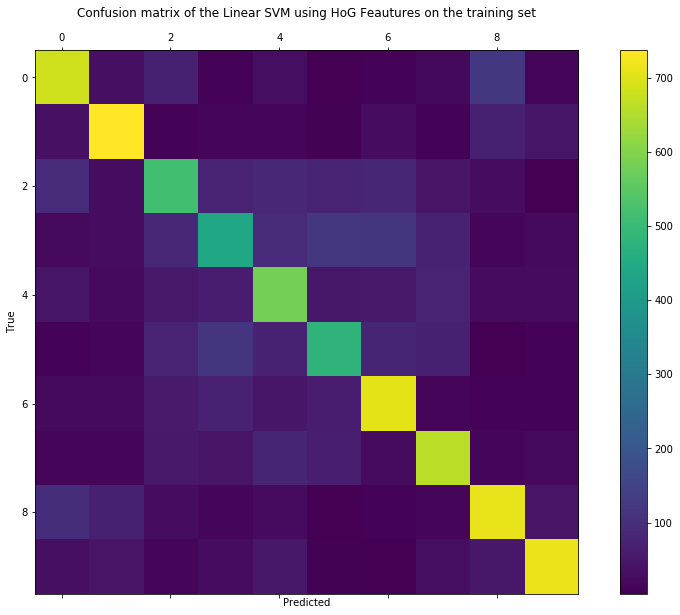

In [34]:
fig = plt.figure(figsize=(15,10))
plt.imshow(conf_svm_train)
ax = fig.add_subplot(111)
cax = ax.matshow(conf_svm_train)
fig.colorbar(cax)
plt.xlabel('Predicted'), plt.ylabel('True')
plt.title('Confusion matrix of the Linear SVM using HoG Feautures on the training set')
plt.show()

In [35]:
print('The accuracy of the Linear SVM using HoG Feautures on the test set is: {}'.format(score_svm_h))

The accuracy of the Linear SVM using HoG Feautures on the test set is: 0.5381


[[619  37  87  19  46   9  24  15 117  27]
 [ 48 668  20  16  33   6  40   8  79  82]
 [101  21 410  91  92 111  87  48  26  13]
 [ 43  32 102 333 104 147 119  56  20  44]
 [ 47  16  70  78 493  65  90  94  26  21]
 [ 19  15  83 212  80 390 109  72   8  12]
 [ 18  27  51  70  65  66 654  19  20  10]
 [ 22  15  69  57 109  91  36 557  16  28]
 [134  66  29  17  25   4  12  15 630  68]
 [ 40  84  23  41  44  17  13  42  69 627]]


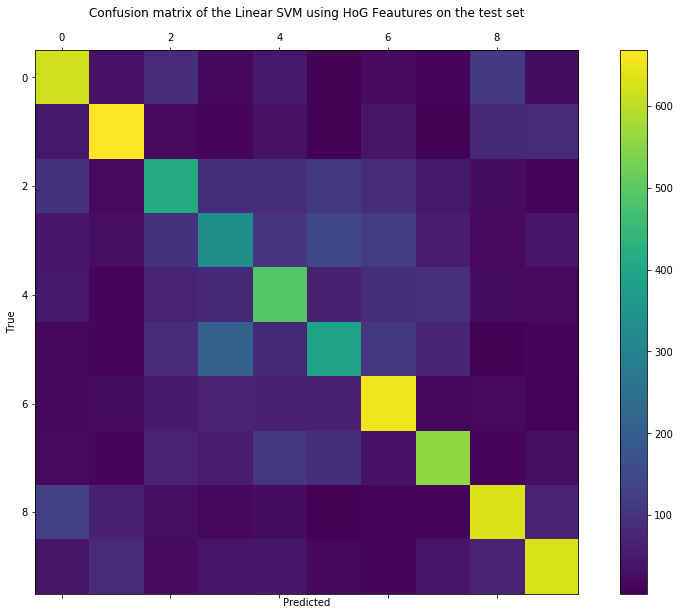

In [36]:
conf_svm_test = confusion_matrix(test_labels, predicted_hog_svm)
print(conf_svm_test)

fig = plt.figure(figsize=(15,10))
plt.imshow(conf_svm_test)
ax = fig.add_subplot(111)
cax = ax.matshow(conf_svm_test)
fig.colorbar(cax)
plt.xlabel('Predicted'), plt.ylabel('True')
plt.title('Confusion matrix of the Linear SVM using HoG Feautures on the test set')
plt.show()

##### For RF Classifier

In [13]:
rfc_250 = clf_250.fit(hf, labels)
predicted_hog_rf = rfc_250.predict(hf)
train_score_hog_rf = accuracy_score(predicted_hog_rf,labels)
print('The accuracy of the RF (250 Trees) using HoG Feautures on the trainning set is: {}'.format(train_score_hog_rf))

The accuracy of the RF (250 Trees) using HoG Feautures on the trainning set is: 1.0


[[1005    0    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0    0 1032    0    0    0    0    0    0    0]
 [   0    0    0 1016    0    0    0    0    0    0]
 [   0    0    0    0  999    0    0    0    0    0]
 [   0    0    0    0    0  937    0    0    0    0]
 [   0    0    0    0    0    0 1030    0    0    0]
 [   0    0    0    0    0    0    0 1001    0    0]
 [   0    0    0    0    0    0    0    0 1025    0]
 [   0    0    0    0    0    0    0    0    0  981]]


c:\users\isaac\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


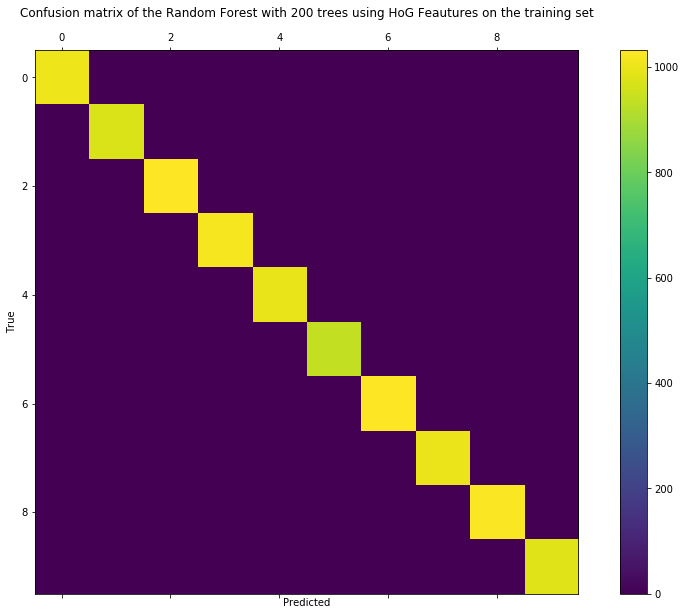

In [14]:
conf_rf_train = confusion_matrix(labels,predicted_hog_rf)
print(conf_rf_train)

fig = plt.figure(figsize=(15,10))
plt.imshow(conf_rf_train)
ax = fig.add_subplot(111)
cax = ax.matshow(conf_rf_train)
fig.colorbar(cax)
plt.xlabel('Predicted'), plt.ylabel('True')
plt.title('Confusion matrix of the Random Forest with 200 trees using HoG Feautures on the training set')
plt.show()

In [16]:
predict_rf250_test = rfc_250.predict(test_hf)
score_rf250_test = accuracy_score(predict_rf250_test,test_labels)
print('The accuracy of the Random Forest using 250 trees with HoG Feautures on the test set is: {}'.format(score_rf250_test))

The accuracy of the Random Forest using 250 trees with HoG Feautures on the test set is: 0.5431


[[ 84 102  67  52  97 112 149  81 127 134]
 [ 80  91  57  55 109 126 158  85 117  96]
 [105 110  66  71 129 113 126  78 124 110]
 [ 88  97  77  74 110 122 132  86 116 114]
 [ 77 119  70  61 104 100 150  81 119 118]
 [ 84 106  52  64  98 103 153  89 102  86]
 [ 78 120  76  73 122 110 138  92 109 112]
 [ 78  94  75  86 114  92 148  93 103 118]
 [ 90 124  57  75 103  95 138 100 123 120]
 [ 76 100  61  67 108 117 152  76 117 107]]


c:\users\isaac\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


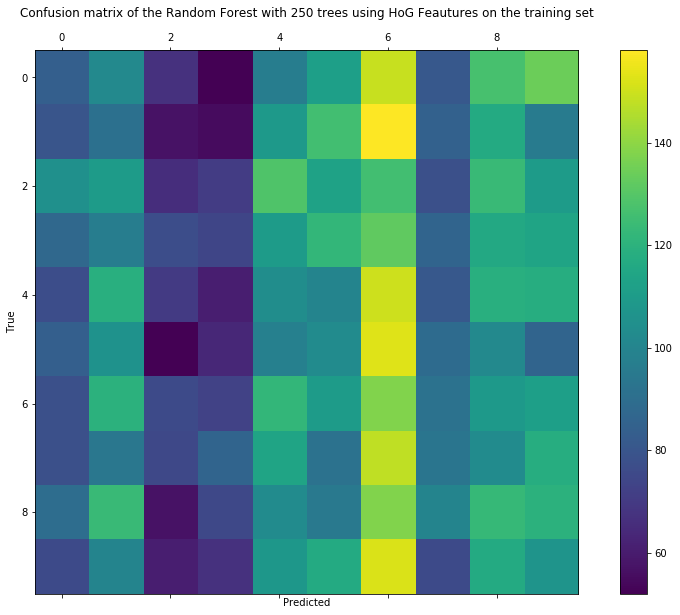

In [17]:
conf_rf_test = confusion_matrix(labels,predict_rf250_test)
print(conf_rf_test)

fig = plt.figure(figsize=(15,10))
plt.imshow(conf_rf_test)
ax = fig.add_subplot(111)
cax = ax.matshow(conf_rf_test)
fig.colorbar(cax)
plt.xlabel('Predicted'), plt.ylabel('True')
plt.title('Confusion matrix of the Random Forest with 250 trees using HoG Feautures on the training set')
plt.show()

On the trainning sets, the SVM had a lower score than the RF. This is due to the fact that the Kernel used for the SVM is a Linear one.
From the confusion Matrix of the test set for the RF classifier, one can see that it got the best accuracy predicting the label "6", which corresponds to the category "frogs", and it has a harder time with the labels "0" which corresponds to airplanes.

## 4.2: Exploring Different Parameters of HoG

Will be comparing HoG feautures extracted with different parameters on Random Forests with 250 Trees.

In [18]:
cell_size = (4, 4)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9 

h2_train = my_HOG(imgs)
h2_test = my_HOG(test_imgs)

cell_size = (8, 8)  # h x w in pixels
block_size = (4, 4)  # h x w in cells
nbins = 9 

h3_train = my_HOG(imgs)
h3_test = my_HOG(test_imgs)

cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 13

h4_train = my_HOG(imgs)
h4_test = my_HOG(test_imgs)

hf_2 = h2_train.reshape(10000,h2_train.shape[1])
hf_3 = h3_train.reshape(10000,h3_train.shape[1])
hf_4 = h4_train.reshape(10000,h4_train.shape[1])

test_hf_2 = h2_test.reshape(10000,1764)
test_hf_3 = h3_test.reshape(10000,144)
test_hf_4 = h4_test.reshape(10000,468)

In [19]:
rfc_250_2 = clf_250.fit(hf_2, labels)
predicted_rf_250_2 = rfc_250_2.predict(test_hf_2)
rfc250_2_score = accuracy_score(test_labels,predicted_rf_250_2)

In [20]:
rfc_250_3 = clf_250.fit(hf_3, labels)
predicted_rf_250_3 = rfc_250_3.predict(test_hf_3)
rfc250_3_score = accuracy_score(test_labels,predicted_rf_250_3)

In [21]:
rfc_250_4 = clf_250.fit(hf_4, labels)
predicted_rf_250_4 = rfc_250_4.predict(test_hf_4)
rfc250_4_score = accuracy_score(test_labels,predicted_rf_250_4)

In [22]:
print(rfc250_2_score)
print(rfc250_3_score)
print(rfc250_4_score)

0.4887
0.5431
0.533


The best score using a Random Forest with 250 Trees, from the three expecriments performed above, was using the following HoG Parameters:

cell_size = (8, 8)  
block_size = (4, 4)  
nbins = 9   


### 4.3: Folded Validation

In [47]:
# Reding other batches for folded Validation:

datadict2 = unpickle(r'cifar-10-python.tar\cifar-10-batches-py\data_batch_2')
datadict3 = unpickle(r'cifar-10-python.tar\cifar-10-batches-py\data_batch_3')

X_batch2 = datadict2[b"data"]
Y_batch2 = datadict2[b'labels']

X_batch3 = datadict3[b"data"]
Y_batch3 = datadict3[b'labels']

cell_size = (8, 8)  # h x w in pixels
block_size = (4, 4)  # h x w in cells
nbins = 9 

In [25]:
# For train batch
imgs_batch2 = []
labels_batch2 = []
categories_batch2 = []
meansRed_batch2 = []
meansGreen_batch2 = []
meansBlue_batch2 = []

imgs_batch3 = []
labels_batch3 = []
categories_batch3 = []
meansRed_batch3 = []
meansGreen_batch3 = []
meansBlue_batch3 = []

for im_idx in range(10000):
    im_batch2 = X_batch2[im_idx, :]
    
    im_r = im_batch2[0:1024].reshape(32, 32)
    im_g = im_batch2[1024:2048].reshape(32, 32)
    im_b = im_batch2[2048:].reshape(32, 32)

    imgs_batch2.append(np.dstack((im_r, im_g, im_b))) #Shape the images 
    labels_batch2.append(Y_batch2[im_idx])
    categories_batch2.append(meta[b'label_names'][Y_batch2[im_idx]])


    im_batch3 = X_batch3[im_idx, :]
    im_r = im_batch3[0:1024].reshape(32, 32)
    im_g = im_batch3[1024:2048].reshape(32, 32)
    im_b = im_batch3[2048:].reshape(32, 32)  
    imgs_batch3.append(np.dstack((im_r, im_g, im_b))) #Shape the images 
    labels_batch3.append(Y_batch3[im_idx])
    categories_batch3.append(meta[b'label_names'][Y_batch3[im_idx]])

In [48]:
#Train Best Performing HoG Feautures on the two new batches of images
h_batch2_train = my_HOG(imgs_batch2)
h_batch3_train = my_HOG(imgs_batch3)

hf_batch2 = h_batch2_train.reshape(10000,h_batch2_train.shape[1])
hf_batch3 = h_batch3_train.reshape(10000,h_batch3_train.shape[1])

h_test2 = my_HOG(test_imgs)
test_hf2 = h_test2.reshape(10000,h_test2.shape[1])

In [49]:
# Computing SVM predictions with the new HoG feautures.
linearHog_svm_batch1 = svms.fit(hf_3, labels)
predicted_batch1_svm = linearHog_svm_batch1.predict(test_hf_3)
score_batch1_svm = accuracy_score(predicted_batch1_svm,test_labels)

In [50]:
linearHog_svm_batch2 = svms.fit(hf_batch2, labels_batch2)
predicted_batch2_svm = linearHog_svm_batch2.predict(test_hf2)
score_batch2_svm = accuracy_score(predicted_batch2_svm,test_labels)

linearHog_svm_batch3 = svms.fit(hf_batch3, labels_batch3)
predicted_batch3_svm = linearHog_svm_batch3.predict(test_hf2)
score_batch3_svm = accuracy_score(predicted_batch3_svm,test_labels)

In [51]:
rfc_batch2 = clf_250.fit(hf_batch2, labels_batch2)
predicted_batch2_rf = rfc_batch2.predict(test_hf2)
score_batch2_rf = accuracy_score(predicted_batch2_rf,test_labels)

rfc_batch3 = clf_250.fit(hf_batch3, labels_batch3)
predicted_batch3_rf = rfc_batch3.predict(test_hf2)
score_batch3_rf = accuracy_score(predicted_batch3_rf,test_labels)

In [52]:
print('The score for the Linear SVM on batch 1 was: {}'.format(score_batch1_svm))
print('The score for the Linear SVM on batch 2 was: {}'.format(score_batch2_svm))
print('The score for the Linear SVM on batch 3 was: {}'.format(score_batch3_svm))

print('The score for the RF on batch 1 was: {}'.format(rfc250_3_score))
print('The score for the RF on batch 2 was: {}'.format(score_batch2_rf))
print('The score for the RF on batch 3 was: {}'.format(score_batch3_rf))

The score for the Linear SVM on batch 1 was: 0.5074
The score for the Linear SVM on batch 2 was: 0.5056
The score for the Linear SVM on batch 3 was: 0.5017
The score for the RF on batch 1 was: 0.5431
The score for the RF on batch 2 was: 0.5424
The score for the RF on batch 3 was: 0.5419


Using the HoG Feautures that provided the best score in the previous section using RF, gave lower score for the SVM than with the original parameters. Overall, for both of the classifiers, batch1 had a slightly better score than the other two. This might be due to the specific images contained in the batches use to train the classifier.

### 4.4: Ensemble Classifiers

In [53]:
predictions = np.dstack([predicted_batch1_svm,predicted_batch2_svm,predicted_batch3_svm,predicted_rf_250_3,
                         predicted_batch2_rf,predicted_batch3_rf])

predictions = np.squeeze(predictions)

true_pred = np.apply_along_axis(lambda row: np.argmax(np.bincount(row)),1,predictions)
conf_true = confusion_matrix(test_labels,true_pred)

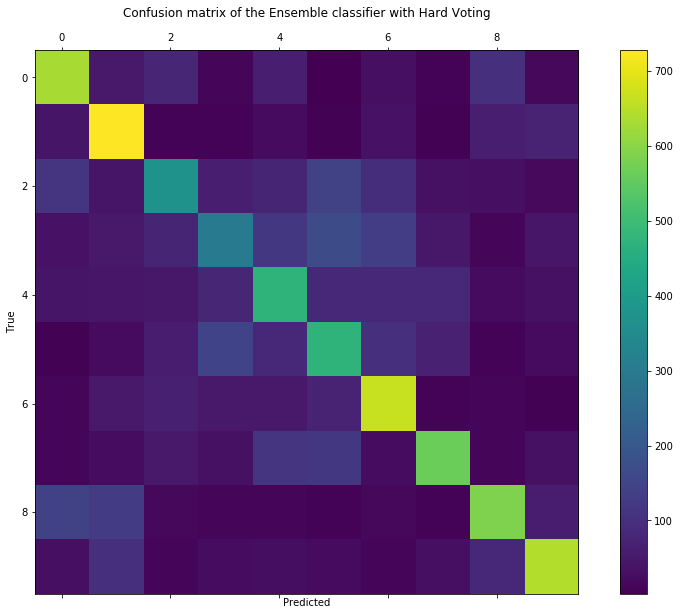

In [56]:
fig = plt.figure(figsize=(15,10))
plt.imshow(conf_true)
ax = fig.add_subplot(111)
cax = ax.matshow(conf_true)
fig.colorbar(cax)
plt.xlabel('Predicted'), plt.ylabel('True')
plt.title('Confusion matrix of the Ensemble classifier with Hard Voting')
plt.show()

In [55]:
ensemble_score = accuracy_score(test_labels,true_pred)
print('The score for the ensemble classifier was: {}'.format(ensemble_score))

The score for the ensemble classifier was: 0.5445


From looking at the accuracy scores and the confusion matrix, one can easily see that the ensemble classifier predictions are the most accurate in this case. This is due to the fact the hard voting will choose the most common label for each prediction. This results in a higher accuracy than any individual classifier.